# The Carnot Cycle

We have discussed, briefly, the idea of gasses expanding and contracting and how to compute internal energy, work, and heat along different expansion/contraction paths.  Today we will discuss combining multiple steps into a cycle and computing internal energy, enthalpy, work and heat along this cycle.

## Learning goals:

After this lesson, students should be able to:
1. Define what an adiabatic expansion/contraction of an ideal gas is
2. Compute $\Delta U$, $\Delta H$, $q$ and $w$ for an adiabatic expansion/contraction of an ideal gas
3. Compute $\Delta U$, $\Delta H$, $q$ and $w$ along the steps of the Carnot Cycle
4. Compute $\Delta U$, $\Delta H$, $q$ and $w$ for the overall Carnot Cycle
5. Draw a Carnot cycle on a PV diagram
6. Relate volumes along Carnot cycle
7. Compute efficiency of a heat engine following Carnot cycle

## Coding Concepts

1. Variables
2. Plotting with matplotlib

## The Carnot Cycle

The Carnot cycle is a special four point Thermodynamic cycle of an ideal gas.  It is the most efficient (can be shown when we learn about the second Law) cycle possible. It involves two types of reversible processes: (1) isothermal expansion/contration and (2) adiabatic expansion/contration.  We will derive some equations for (2) and use what we already know about (1).

### Adiabatic expansion/contration

Adiabatic expansion/contraction is defined as a process for which there is not heat exhange.  Meaning $q=0$.  This yields simple expressions for $w$ and $\Delta U$ and $\Delta H$:

$\Delta U = C_V\Delta T$

$\Delta H = C_P\Delta T$

$w = \Delta U = C_V\Delta T$

### Adiabatic expansion/contraction on a PV diagram

But what does an adiabat look like on a PV diagram?   To determine this, we need to know what the restriction $q=0$ puts on $P$ as a function of $V$.  

$P = \frac{nRT}{V}$ 

The restriction of $q=0$ puts restrictions on $\frac{T}{V}$.  Let's see what this will look like.

We start by writing out the differential form of the internal energy equation

\begin{align}
dU &= \delta q + \delta w \\
&= \delta w
\end{align}

since no heat transfer in an adiabatic process.  We now plug in for internal energy of an ideal gas $\delta w = -PdV$ (reversible):

\begin{align}
dU &= \delta w \\
C_V dT &= -PdV \\
C_V dT & -\frac{nRT}{V}dV
\end{align}

where the last line I have used the ideal gas law (equation of state).  At this juncture we can integrate both sides.  But note that we cannot assume $T$ is constant because the process is ***not*** isothermal.

\begin{align}
\int_{T_1}^{T_2}C_V dT &= -\int_{V_1}^{V_2}\frac{nRT}{V}dV
\end{align}

Note that the left hand side of the previous equation is integrating over temperature and the right hand side is integrating over volume.  There is a $T$ on the right hand side so we divide both sides of the equation to get it to the left hand side.

\begin{align}
\int_{T_1}^{T_2}C_V dT &= -\int_{V_1}^{V_2}\frac{nRT}{V}dV \\
\Rightarrow \int_{T_1}^{T_2}\frac{C_V}{T} dT &= -\int_{V_1}^{V_2}\frac{nR}{V}dV \\
\Rightarrow C_V\ln\left( \frac{T_2}{T_1} \right) &= -nR\ln\left( \frac{V_2}{V_1} \right) \\
\Rightarrow \ln\left( \frac{T_2}{T_1} \right)^{C_V} &= \ln\left( \frac{V_2}{V_1} \right)^{-nR} \\
\Rightarrow \left( \frac{T_2}{T_1} \right)^{C_V} &= \left( \frac{V_2}{V_1} \right)^{-nR} \\
\Rightarrow \left( \frac{P_2V_2}{P_1V_1} \right)^{C_V} &= \left( \frac{V_2}{V_1} \right)^{-nR}\\
\Rightarrow \left( \frac{P_2}{P_1} \right)^{C_V} &= \left( \frac{V_2}{V_1} \right)^{-nR-C_V}\\
\Rightarrow \left( \frac{P_2}{P_1} \right)^{C_V} &= \left( \frac{V_1}{V_2} \right)^{nR+C_V}\\
\Rightarrow PV^{5/3} &= const
\end{align}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_PV_diagram_adiabat(n=1,R=0.08206,V=np.arange(0.5,7.1,0.1),pUnit="atm",vUnit="L",T1=100,T2=200,fontsize=16):
    xlabel = "V (" + vUnit + ")"
    ylabel = "P (" + pUnit + ")"
    # setup plot parameters
    fig = plt.figure(figsize=(8,6), dpi= 80, facecolor='w', edgecolor='k')
    ax = plt.subplot(111)
    ax.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
    ax.set_xlabel(xlabel,size=fontsize)
    ax.set_ylabel(ylabel,size=fontsize)
    plt.tick_params(axis='both',labelsize=fontsize)
    # plot isotherms
    label = "T$_1$=" + str(T1)+" K"
    ax.plot(V,n*R*T1/V,label=label,lw=4)
    label = "T$_2$=" + str(T2)+" K"
    ax.plot(V,n*R*T2/V,label=label,lw=4)
    # adiabat 1
    lowV = (T1*1.5**(2/3)/T2)**(3/2)
    highV = 1.5
    Vadiabat1 = np.arange(lowV,highV+0.1,0.1)
    ax.plot(V,n*R*T1*1.5**(2/3)/V**(5/3),label="Adiabat 1",lw=4)
    ax.plot(Vadiabat1,n*R*T1*1.5**(2/3)/Vadiabat1**(5/3),lw=1,c="k")
    label = "(" + str(1.5) +","+ str(np.round(n*R*T1/1.5,decimals=1)) + "," +str(T1)+")"
    label = "(V$_1$,P$_1$,T$_1$)"
    ax.annotate(label,xy=(0.5,n*R*T1/1.5-1),fontsize=fontsize)
    plt.scatter(1.5,n*R*T1/1.5,s=50,color="tab:blue")
    label = "(" + str(1.5) +","+ str(np.round(n*R*T2/1.5,decimals=1)) + "," +str(T2)+")"
    label = "(V$_2$,P$_2$,T$_2$)"
    plt.scatter(lowV,n*R*T2/lowV,s=50,color="tab:orange")
    ax.annotate(label,xy=(lowV+0.05,n*R*T2/lowV),fontsize=fontsize)
    ax.annotate("A",xy=(0.4,n*R*T1/1.5+ 0.5*(n*R*T2/lowV-n*R*T1/1.5)),fontsize=fontsize*1.5)
    label = "(" + str(2.5) +","+ str(np.round(n*R*T2/2.5,decimals=1)) + "," +str(T2)+")"
    label = "(V$_3$,P$_3$,T$_2$)"
    # adiabat 2
    lowV2 = 2.5
    highV2 = (T2*2.5**(2/3)/T1)**(3/2)
    Vadiabat2 = np.arange(lowV2,highV2+0.1,0.1)
    ax.plot(V,n*R*T2*2.5**(2/3)/V**(5/3),label="Adiabat 2",lw=4)
    ax.plot(Vadiabat2,n*R*T2*2.5**(2/3)/Vadiabat2**(5/3),lw=1,c="k")
    plt.scatter(2.5,n*R*T2/2.5,s=50,color="tab:orange")
    ax.annotate(label,xy=(2.6,n*R*T2/2.5),fontsize=fontsize)
    ax.annotate("B",xy=(1.5,n*R*T2/2+3),fontsize=24)
    label = "(" + str(2.5) +","+ str(np.round(n*R*T1/2.5,decimals=1)) + "," +str(T1)+")"
    label = "(V$_4$,P$_4$,T$_1$)"
    plt.scatter(highV2,n*R*T1/highV2,s=50,color="tab:blue")
    ax.annotate(label,xy=(highV2,n*R*T1/highV2),fontsize=fontsize)
    ax.annotate("C",xy=(4.25,3.0),fontsize=fontsize*1.5)
    ax.annotate("D",xy=(3,n*R*T1/2-3.0),fontsize=fontsize*1.5)
    vsub = np.arange(lowV,2.51,0.01)
    ax.plot(vsub,n*R*T2/vsub,lw=1,c="k")
    vsub = np.arange(1.5,highV2+0.01,0.01)
    ax.plot(vsub,n*R*T1/vsub,lw=1,c="k")
    ax.fill_between(np.arange(1.5,2.51,0.01),n*R*T1/np.arange(1.5,2.51,0.01),n*R*T2/np.arange(1.5,2.51,0.01),facecolor="purple",alpha=0.5,interpolate=True)
    ax.fill_between(np.arange(lowV,1.51,0.01),n*R*T2/np.arange(lowV,1.51,0.01),n*R*T1*1.5**(2/3)/np.arange(lowV,1.51,0.01)**(5/3),facecolor="purple",alpha=0.5,interpolate=True)
    ax.fill_between(np.arange(2.5,highV2+0.01,0.01),n*R*T2*2.5**(2/3)/np.arange(2.5,highV2+0.01,0.01)**(5/3),n*R*T1/np.arange(2.5,highV2+0.01,0.01),facecolor="purple",alpha=0.5,interpolate=True)
    ax.set_ylim(0,35)
    plt.legend(fontsize=fontsize)

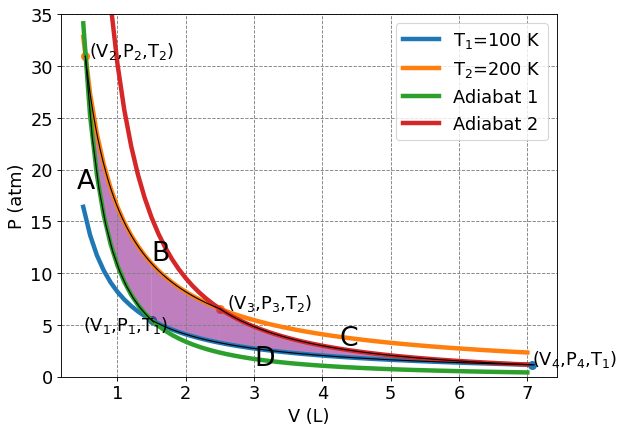

In [2]:
plot_PV_diagram_adiabat()

There are four points and four processes on the above plot.  We will define them as:

$A$ : adiabatic contraction from $(V_1,P_1,T_1)$ to $(V_2,P_2,T_2)$

$B$ : isothermal expansion from $(V_2,P_2,T_2)$ to $(V_3,P_3,T_2)$

$C$ : adiabatic expansion from $(V_3,P_3,T_2)$ to $(V_4,P_4,T_1)$

$D$ : isothermal contraction from $(V_4,P_4,T_1)$ to $(V_1,P_1,T_1)$

### $A$: Adiabatic Contraction

We want to compute $w_A$, $q_A$, $\Delta U_A$, and $\Delta H_A$ for a reversible adiabatic contraction from $(V_1,P_1,T_1)$ to $(V_2,P_2,T_2)$.  

Equations and results are from above derivation but one must be careful that we are starting at $(V_1,P_1,T_1)$ and ending at $(V_2,P_2,T_2)$.  

$\Delta U_C = C_V \Delta T = \frac{3}{2}nR(T_2-T_1)$

$\Delta H_C = C_P \Delta T = \frac{5}{2}nR(T_2-T_1)$

$w_C = C_V \Delta T = \frac{3}{2}nR(T_2-T_1)$

$q_C = 0$

### $B$: Isothermal Expansion

We want to compute $w_B$, $q_B$, $\Delta U_B$, and $\Delta H_B$ for a reversible isothermal expansion from $(V_2,P_2,T_2)$ to $(V_3,P_3,T_2)$.    

For an isothermal expansion/contraction of an ideal gas from $(V_2,P_2,T_2)$ to $(V_3,P_3,T_2)$:

$\Delta U_B = 0$

$\Delta H_B = 0$

$w_B = nRT_2\ln\left(\frac{V_2}{V_3}\right)$

$q_B = nRT_2\ln\left(\frac{V_3}{V_2}\right)$

### $C$: Adiabatic Expansion

Compute $w_C$, $q_C$, $\Delta U_C$, and $\Delta H_C$ for adiabatic expansion starting from $(V_3,P_3,T_2)$ and ending at $(V_4,P_4,T_1)$.  

Equations and results are very comparable to process $A$ but one must be careful that we are starting at $(V_3,P_3,T_2)$ and ending at $(V_4,P_4,T_1)$.  

$\Delta U_C = C_V \Delta T = \frac{3}{2}nR(T_1-T_2)$

$\Delta H_C = C_P \Delta T = \frac{5}{2}nR(T_1-T_2)$

$w_C = C_V \Delta T = \frac{3}{2}nR(T_1-T_2)$

$q_C = 0$

### $D$: Isothermal Contraction

We want to compute $w_D$, $q_D$, $\Delta U_D$, and $\Delta H_D$ for a reversible isothermal expansion from $(V_4,P_4,T_1)$ to $(V_1,P_1,T_1)$.  

We will use the same equations as the isothermal expansion process but take care about the beginning and end points.

$\Delta U_D = 0$

$\Delta H_D = 0$

$w_D = nRT_1\ln\left(\frac{V_4}{V_1}\right)$

$q_D = nRT_1\ln\left(\frac{V_1}{V_4}\right)$

### Summary

| Process                    | $w$                            | $q$                 | $\Delta U$                 | $\Delta H$
| :------------------------- | :------------------------------------- | :------------------------------------- | :------------------------------------- | :------------------------------------- |
| A - Adiabatic Contraction      | $\frac{3}{2}nR(T_2-T_1)$                                    | $0$ | $\frac{3}{2}nR(T_2-T_1)$             | $\frac{5}{2}nR(T_2-T_1)$ |
| B - Isothermal Expansion   | $nRT_2\ln\left(\frac{V_2}{V_3}\right)$ | $nRT_2\ln\left(\frac{V_3}{V_2}\right)$ | $0$                 | $0$ |
| C - Adiabatic Expansion      | $\frac{3}{2}nR(T_1-T_2)$                                     | $0$ | $\frac{3}{2}nR(T_1-T_2)$                   | $\frac{5}{2}nR(T_1-T_2)$ |
| D - Isothermal Contraction | $nRT_1\ln\left(\frac{V_4}{V_1}\right)$ | $nRT_1\ln\left(\frac{V_1}{V_4}\right)$ | $0$ | $0$ |

Totals:

$w_{total} = \frac{3}{2}nR(T_2-T_1) + nRT_2\ln\left(\frac{V_2}{V_3}\right)  + \frac{3}{2}nR(T_1-T_2) +nRT_1\ln\left(\frac{V_4}{V_1}\right) $

$ = nRT_2\ln\left(\frac{V_2}{V_3}\right)  + nRT_1\ln\left(\frac{V_4}{V_1}\right) $

$q_{total} = nRT_2\ln\left(\frac{V_3}{V_2}\right)  + nRT_1\ln\left(\frac{V_1}{V_4}\right) $

$\Delta U_{total} = \frac{3}{2}nR(T_2-T_1) + \frac{3}{2}nR(T_1-T_2) =0 $

$\Delta H_{total} = \frac{5}{2}nR(T_2-T_1) + \frac{5}{2}nR(T_1-T_2) =0 $



### Relationship between $V_1$, $V_2$, $V_3$, $V_4$ 

We would like to know sign of $q$ and $w$.  In order to combine the two terms in each, we need to figure out the relationship between the ratios in the logarithms.  Because this cycle involves *isothermal* and *adiabatic* process, there are restrictions on the relationships between the four volumes.  We will attempt to determine the relationship between

$\frac{V_2}{V_3}$ and $\frac{V_4}{V_1}$.  

The fact that processes $A$ and $D$ are adiabats puts restrictions on pressure and volume along those processes:

$P_1V_1^{5/3} = P_2V_2^{5/3}$

and

$P_3V_3^{5/3} = P_4V_4^{5/3}$

These equations can be rearragned to get

$\frac{P_1V_1^{5/3}}{P_2V_2^{5/3}} = \frac{P_4V_4^{5/3}}{P_3V_3^{5/3}}$

Now rearrange to get the isothermal terms on same sides:

$\frac{P_1V_1^{5/3}}{P_4V_4^{5/3}} = \frac{P_2V_2^{5/3}}{P_3V_3^{5/3}}$

Because process $B$ is isothermal, we have $P_2V_2 = P_3V_3$ and because process $D$ is isothermal we have $P_1V_1 = P_4V_4$.

$\frac{P_1V_1V_1^{2/3}}{P_4V_4V_4^{2/3}} = \frac{P_2V_2V_2^{2/3}}{P_3V_3V_3^{2/3}}$

$\Rightarrow \frac{V_1^{2/3}}{V_4^{2/3}} = \frac{V_2^{2/3}}{V_3^{2/3}}$

or, simply,

$\frac{V_1}{V_4} = \frac{V_2}{V_3}$

Now to plug back into $w_{total}$ and $q_{total}$:

\begin{align}
w_{total} =& nRT_2\ln\left(\frac{V_2}{V_3}\right)  + nRT_1\ln\left(\frac{V_4}{V_1}\right)\\
& = nRT_2\ln\left(\frac{V_1}{V_4}\right)  + nRT_1\ln\left(\frac{V_4}{V_1}\right)\\ 
& = nR\ln\left(\frac{V_1}{V_4}\right)\Delta T
\end{align}

\begin{align}
q_{total} =& nRT_2\ln\left(\frac{V_3}{V_2}\right)  + nRT_1\ln\left(\frac{V_1}{V_4}\right) \\
 = & nRT_2\ln\left(\frac{V_4}{V_1}\right)  + nRT_1\ln\left(\frac{V_1}{V_4}\right) \\
 = & - nR\ln\left(\frac{V_1}{V_4}\right)\Delta T 
\end{align}

### Sign of heat and work

$w_{total} < 0$ if ($\Delta T < 0$ and $\frac{V_1}{V_4} > 1$) OR ($\Delta T > 0$ and $\frac{V_1}{V_4} < 1$) $\Rightarrow$ clockwise on PV diagram

$w_{total} > 0$ if ($\Delta T < 0$ and $\frac{V_1}{V_4} < 1$) OR ($\Delta T > 0$ and $\frac{V_1}{V_4} > 1$) $\Rightarrow$ counter-clockwise on PV diagram

### Efficiency

For a heat engine ($w_{total}<0$), the efficiency is the amount of work extracted, $w_{total}$, divided by the energy in put, $q_{in}$.

$\varepsilon = \frac{w_{total}}{q_{in}}$

For the Carnot cycle, this becomes:

$\varepsilon = \frac{T_h-T_c}{T_h}$

In [3]:
2*16/3

10.666666666666666